# Monte Carlo simulations 



## Objective 
In this notebook we program the simulation showed in https://www.youtube.com/watch?v=7ESK5SaP-bc&ab_channel=MarbleScience to obtain pi.
The simulation drops balls into a square and a circle enclosed by a bigger area,where the probability of the ball landing into one af the shapes is proportional to the cross section area, the area of the square(A(s)) is a^2 and the area of the circle(A(c)) is pi(a^2). Then it folows that A(c)/A(s) =(pi(a^2))/(a^2) = pi


## Procedure 
In order to "simulate" the areas we have to create a matrix of zeros for the empty space ones where the circluar shape is and twos for the square, then we code a random number generator, the number will be equal to our matrix index, if the inex has a zero dont do anyting if the index has a one add one to circle_count, if the value has a 2 add one to square_ count.
As sated before the probability of the ball landing on the area is proportional to the area therefore circle_count, and square_count are proportional to their respective ares.
following from this pi = circle_count/square_count



## code 

### Import libraries


In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import random

### Program the Matrix with circle

In [20]:
# create a matrix of zeros 
z = np.zeros((400,400))
# specify circle paramters
#center 
ci, cj = 232, 145
#radius
cr = 50
#cretae index arrays to z 
# use meshgrid to create coordinates in matrix https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
#using arrange (Return evenly spaced values within a given interval). https://numpy.org/doc/stable/reference/generated/numpy.arange.html
I,J = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))
#calculate distance of all points to centre using pitagoras
dist= np.sqrt((I-ci)**2 +(J-cj)**2)
#Assign value of 1 to those points were dist<cr:
z[np.where(dist<=cr)] = 1



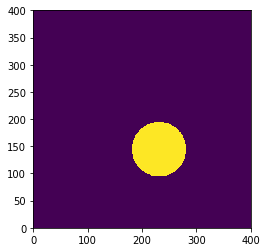

In [21]:
# plot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')

### Program the Matrix with square



In [18]:
# create a matrix with zeros 
z = np.zeros((400, 400))
# get the square coordintaes i, j
z[100:200, 100: 200] = 1


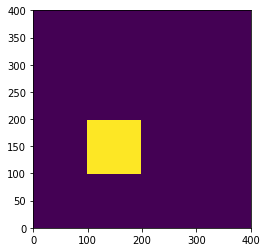

In [19]:
# plot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')

### Program the Surface

In [54]:
# create a zero matrix
def surface():
  """
  Generates a deired surface with a square and a circle
  to implement our simulation
  """
  z= np.zeros((450, 450))
  #specify circle parameters(put in the up right hand corner)
  ci, cj = 260, 260
  cr = 140
  #create coordintates 
  I,J = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))
  #calculate distance of all points to centre using pitagoras
  dist= np.sqrt((I-ci)**2 +(J-cj)**2)
  #Assign value of 1 to those points were dist<cr:
  z[np.where(dist<=cr)] = 1

  # create square(in the down left hand corener)

  z[10:150, 10: 150] = 2
  return z
z = surface()

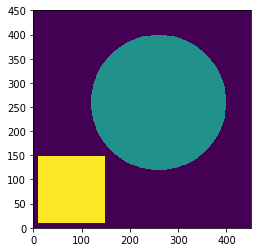

In [55]:
# plot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')

### Create random number generator 

In [50]:
# create a random number between 0 and 449 for both i and j axis 
ni = random.randint(0,499)
nj = random.randint(0,499)

In [51]:
ni,nj

(398, 373)

### Create simulation 

Put toghether the surface and the random number geneartor loop it and check results 

In [67]:
def simulation(n, surface):
  """
  takes amount of times that simulation runs(n),
  and the surface where it will be run
  """
  #create counts 
  circle_counts = 0
  square_counts = 0 
  outside_counts = 0
  for i in range(n):
    ni = random.randint(0,449)
    nj = random.randint(0,449)
    if surface[ni,nj] == 1:
      circle_counts += 1
    elif surface[ni,nj] == 2:
      square_counts += 1
    else:
      outside_counts += 1
  # check the sum of our surfaces equal to n
  if (circle_counts + square_counts + outside_counts) == n:
    # calculate pi 
    pi = circle_counts/square_counts
  return pi



In [82]:
pi = simulation(4000000, z)

In [83]:
pi

3.141901877900307